<a href="https://colab.research.google.com/github/franklinjerry/guvi/blob/main/Copy_of_Assessment2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as exp

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [4]:
given_sample1=pd.read_csv('/content/college_1.csv')
given_sample2=pd.read_csv('/content/college_2.csv')
given_sample=pd.concat([given_sample1,given_sample2])
given_sample.head()
# given_sample.shape

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN


In [5]:
given_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    119 non-null    object 
 1   python                  119 non-null    float64
 2   mysql                   119 non-null    float64
 3   Previous Geekions       119 non-null    int64  
 4   CodeKata Score          119 non-null    int64  
 5   Department              119 non-null    object 
 6   Rising                  119 non-null    int64  
 7   python_en               35 non-null     float64
 8   computational_thinking  35 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 9.3+ KB


In [6]:
given_sample.columns

Index(['Name', 'python', 'mysql', 'Previous Geekions', 'CodeKata Score',
       'Department', 'Rising', 'python_en', 'computational_thinking'],
      dtype='object')

In [7]:
given_sample.describe()

,python,mysql,Previous Geekions,CodeKata Score,Rising,python_en,computational_thinking
count,119.000000,119.000000,119.000000,119.000000,119.000000,35.000000,35.000000
mean,54.352941,23.500000,3842.352941,4051.764706,209.411765,29.657143,2.200000
std,44.272526,33.276671,4406.339992,4551.951881,553.445746,30.582524,7.015948
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,0.000000,0.000000,740.000000,740.000000,0.000000,0.000000,0.000000
50%,82.000000,4.000000,2410.000000,2410.000000,0.000000,20.000000,0.000000
75%,100.000000,33.000000,5340.000000,5975.000000,0.000000,52.000000,0.000000
max,100.000000,100.000000,24500.000000,24500.000000,3140.000000,100.000000,39.000000


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [8]:
exceeded_expectations=given_sample[given_sample["CodeKata Score"]>15000]
exceeded_expectations.to_csv('exceeded_expectations.csv')


In [9]:
reached_expectations=given_sample[(given_sample["CodeKata Score"]>10000)&(given_sample["CodeKata Score"]<15000)]
reached_expectations.to_csv('reached_expectations.csv')

In [10]:
needs_improvement=given_sample[(given_sample["CodeKata Score"]>7000)&(given_sample["CodeKata Score"]<10000)]
needs_improvement.to_csv('needs_improvement.csv')

In [11]:
unsatisfactory=given_sample[given_sample["CodeKata Score"]<7000]
unsatisfactory.to_csv('unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [12]:
given_sample["Previous Geekions"].mean()/given_sample["CodeKata Score"].mean()

0.9483159117305459

###### No of students participated 

In [13]:
print(len(given_sample.Name))

119


###### #Average completion of python course or my_sql or python english or computational thinking

In [14]:
avg_comp=given_sample[['python','mysql','python_en','computational_thinking']]
avg_comp.mean()

python                    54.352941
mysql                     23.500000
python_en                 29.657143
computational_thinking     2.200000
dtype: float64

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [15]:
given_sample["Rising"].nlargest(3).reset_index(drop=True)


0    3140
1    2000
2    2000
Name: Rising, dtype: int64

###### Shining stars of the week (top 3 candidates who has highest geekions)

In [16]:
shinner=given_sample['Previous Geekions'].nlargest(3)
shinner=shinner.reset_index(drop=True)
shinner.index=shinner.index+1
shinner.head(3)

1    24500
2    21740
3    19680
Name: Previous Geekions, dtype: int64

###### Department wise codekata performence (pie chart)

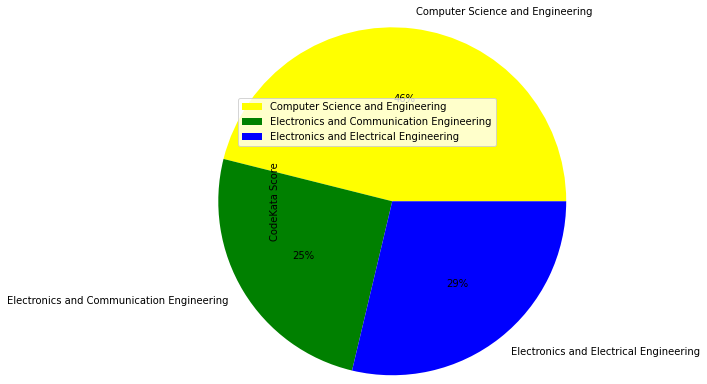

In [17]:
import matplotlib.pyplot as plt
import pandas as pandas
department_wise=given_sample['Department']
scores=given_sample['CodeKata Score']
colors=['yellow','green','blue']
given_sample.groupby(['Department']).mean().plot(kind='pie', y='CodeKata Score',autopct='%1.0f%%',colors=colors,radius=2)


###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [18]:
given_sample['codekata']=given_sample['CodeKata Score']
dwt=given_sample.groupby(['Department']).codekata.max()
dwt

Department
Computer Science and Engineering             24500
Electronics and Communication Engineering    10040
Electronics and Electrical Engineering       19400
Name: codekata, dtype: int64

In [19]:
given_sample

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking,codekata
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN,24500
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN,21740
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN,19680
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN,10610
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN,8980
...,...,...,...,...,...,...,...,...,...,...
30,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0,2380
31,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0,1890
32,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0,1720
33,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0,0


In [20]:
given_sample.shape

(119, 10)

In [21]:
given_sample2.shape

(35, 9)